# Eric LeVally

## Introduction
In physics we are often first taught basic kinematics.  This means we are taught about the physics behind a ball being thrown, the friction between a tire and asphalt, elastic and inelastic collisions, and so on.  But how do these basics affect our everyday lives.  Let us narrow our view of basic kinematics to those of a projectile in motion.  More specifically lets look at deadly projectiles.  The first deadly projectile can be traced back to the stone age, when hunting with spears and arrows was key to survival.  A simple arrow is good for understanding the basics, but does not deal with many modern issues.  A much more common projectile nowadays is an intercontinental ballistic missile or IBM.  An IBM flying through the air can be considered a driven projectile in motion. Because of the height and distance that modern day missiles can travel, the basic equations and models for a projectile are not accurate enough, especially if we wanted to intercept one of these such missiles before it were to hit its target.  This project begins to model the physics behind intercepting an incoming missile (foe) with another missile (friend).


## Model

A missile propels itself by ejecting ignited fuel in the opposite direction of desired motion.  Other than this driving force, the only other forces acting on the missile that I will be modelling are the forces caused by the acceleration of gravity, and the drag force.  Both of these forces, in some way, depend on altitude.  The gravity at any given distance from the center of the Earth is given by the equation: 
$$g = GM/r^{2}$$ 
where G is the gravitational constant $6.67408 \times 10^{-11}m^{3}kg^{-1}s^{-2}$, M is the mass of the Earth in kilograms ($5.972 \times 10^{24}kg$), and r is the distance between the center of the Earth and the object in meters.  The magnitude of the drag force is given by the equation 
$$F_{drag} \approx -C\rho A \upsilon^{2}$$
where C is the drag coefficient, $\rho$ is the density of the air, A is the frontal area of the object, and $\upsilon$ is the velocity of the object.  This equation depends on the density of the air, which we know has different values at different altitudes.  The density of the air at a given altitude is given by the equation 
$$\rho = \rho_{0} exp(-y/y_{0})$$
where y is the altitude, $y_{0} = 1.0 x 10^{4}m$ and $\rho_{0}$ is the density at sea level (y=0).  This gives us that the drag force due to air resistance is actually 
$$F^{*}_{drag} = \frac{\rho}{\rho_{0}}F_{drag}(y=0)$$ In this equation, $F^{*}_{drag}$ is the force due to the air drag at the current altitude.

Euler's method allows us to approximate values for a solution of a differential equation.  So long as we are given a starting value x at some t, then we can write the value of x a short interval $h$ later using a Taylor expansion.  So we have that: $x(t+h) = x(t) + h\frac{dx}{dt} + \frac{1}{2}h^{2}\frac{d^{2}x}{dt^{2}} +...$ which gives us $x(t+h) = hf(x,t) + O(h^{2})$ where $O(h^{2})$ is a shorthand for all of the terms that go as $h^{2}$ and higher.  If $h$ is small, then $h^{2}$ is significantly smaller, and can be ignored.  This allows us to toss out $O(h^{2})$ and leaves us with the following equation.
$$ x(t+h) = x(t) + hf(x,t) $$ 
So long as h remains small enough, we can see fairly accurate solutions to our differential equations.  This means that the relevant controlling equations are those of a projectile.  Using the Euler method, they are: 

$$  x_{i+1} = x_{i} + v_{x,i}\Delta t$$  Where $x_{i+1}$ is the x value at the current step, $x_{i}$ is the x value at the previous step, $v_{x,i}$ is the current x component of the velocity, and $\Delta t$ is the change in time between steps.

$$  v_{x,i+1} =  v_{x,i}$$ Where $v_{x,i+1}$ is the current x component of the velocity and $v_{x,i}$ is the previous x component of the velocity.

$$  y_{i+1} = y_{i} + v_{y,i}\Delta t$$  Where $y_{i+1}$ is the y value at the current step, $y_{i}$ is the y value at the previous step, and $v_{y,i}$ is the current y component of the velocity.

$$  v_{y,i+1} =  v_{y,i} - g\Delta t$$  Where $v_{y,i+1}$ is the current y component of the velocity, $v_{y,i}$ is now the previous y component of the velocity, and $g$ is the acceleration of gravity.  This model allows us to plot the location of our friend and foe missiles as they travel towards each other.

The Runge-Kutta method is a taylor series approximation of the solution, where there is an initial value problem defined as $\dot x = f(t,y), (t_{0}) = y_{0}$.  In this model x is an unknown function of time.  The derivative of x ($\dot x$) is a function of x and t.  The initial x value is $x_{0}$ and is found at time $t_{0}$.  With a step size h which is greater than zero, we can define the equation $x_{n+1} = x_{n} + \frac{1}{6}(k_{1} +2k_{2} +2k_{3} +k_{4})$. Where $k_{1}$ is the increment of the approximation which is based on the slope at the beginning of the interval, $k_{2}$ is the increment of the approximation which is based on the slope at the mid-point of the interval using $k_{1}$, $k_{3}$ is again the increment at the mid-point, but is using $k_{2}$, and $k_{4}$ is the increment of the approximation at the end of the interval using $k_{3}$.

The bisection method works by finding the roots of a nonlinear eqaution for a single variable.  A nonlinear equation can be rearanged so that all of its terms are on one side of the equation, and so it can be written in the form $f(x) = 0$.  When we find the solution to such an equation, we find its root.  This method uses an interval specified by the user, and finds the solution, so long as it is contained somewhere in the given interval.  The method works by first choosing a pair of points $x_{1}$ and $x_{2}$ and checking that $f(x_{1}$ and $f(x_{2})$ have opposite signs.  Second, we calculate te midpoint between the the two points ($x^{\prime}$), and evaluate our function at that point.  If f($x^{\prime}$) has the same sign as $x_{1}$, then $x_{1}$ now equals $x^{\prime}$.  If they have opposite signs, then $x_{2}$ now equals $x^{\prime}$.  If   $\big | x_{1} - x_{2} \big |$ is greater than the target accuracy, then we repeat the procces from the second step until it is.

The shooting method is a trial-and-error method that searches for correct values of initial conditions that give answers that match a given set of boundary conditions.  It starts by guessing some initial value for one of the initial conditions, and then checking if the output matches our boundart conditions.  If not, the program runs again until it finds the initial conditions required to give us our boundary conditions.  The shooting method used in the code below combines the Fourth Order Runge-Kutta method and Bisection method in order to solve for the velocities of our friendly projectile.


For this model, the minimum initial velocity of each projectile will be 750 m/s and the maximum of each will be 1,250 m/s. The firing angles will be a minimum of 20 degrees and a maximum of 75 degrees.  The initial height of the missiles will be at least sea level, and at most 10 kilometers above sea level.  This means that a missile cannot be fired from underwater or underground.
A missile will be coming at us with a random velocity at a random angle, and the program will calculate and output the correct angle and speed that the friendly intercepting missile will need to fire at in order to intercept the incoming missile before it can reach the ground. The output of the program should be an angle and a velocity.

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Shooting Method Code


In [5]:
def velocity_components(tFinal, xFinal, yFinal):
    
    '''Uses the input values to calculate the x and y components of velocity for the friendly projectile
    necessary to reach the given point at the given time.
    
    Inputs:
    tFinal = the final time 
    yFinal = the final y position of the projectile
    xFinal = the final x position of the projectile
    
    Outputs:
    vx = the v component of the velocity necessary to reach the given point at the given time
    vy = the y component of the velocit necessary to reach the given point at the given time'''

    # Constants defined
    g = 9.81 # The acceleration due to gravity in m/s^s
    a = 0.0
    b = tFinal  # Amount of time passed in seconds
    N = 1000 # Number of Runge-Kutta steps
    h = (b-a)/N
    target = 1e-1 # Target accuracy

    def f(r):
        x = r[0]
        y = r[1]
        fx = y
        fy = -g
        return np.array([fx,fy],float)
    
    # The Fourth Order Runge-Kutta Method
    def height(v):
        
        '''Function that solves the equation and calculates the final height using the Runge-Kutta method.
        
        Input:
        v = the guessed velocity
        
        Output: 
        r[0] = the final height
        '''
        r = np.array([-yFinal,v],float)
        for t in np.arange(a,b,h):
            k1 = h*f(r)
            k2 = h*f(r+0.5*k1)
            k3 = h*f(r+0.5*k2)
            k4 = h*f(r+k3)
            r += (k1+2*k2+2*k3+k4)/6

        return r[0]

    v1 = 0.01 
    v2 = 10000.0
    h1 = height(v1)
    h2 = height(v2)

    while abs(h2-h1)>target:
        vp = (v1+v2)/2
        hp = height(vp)
        if h1*hp>yFinal:  # final height of the projectile
            v1 = vp
            h1 = hp

        else:
            v2 = vp
            h2 = hp

    vy = (v1+v2)/2
    vx = xFinal/tFinal
    return(vx, vy)

## Friendly Firing Parameters Code

In [6]:
def firing_parameters(vx, vy):
    
    '''Takes the given inputs and outputs the magnitude and angle that the friendly projectile must be fired at in order to
    hit the enemy projectile
    
    Inputs:
    vx = the x component of the velocity of our friendly projectile
    vy = the y component of the velocity of our friendly projectile
    
    Outputs:
    velocity = the magnitude of the velocity of our friendly projectile
    angle_degrees = the angle at which our friendly projectile should be fired
    
    Example:
    >>> firing_parameters(3,4)
    (5.0, 53.13010235415599)'''
    
    velocity = math.sqrt(vx**2 + vy**2)
    angle_radians = math.acos(vx/velocity)
    angle_degrees = 180/math.pi*angle_radians
    
    return(velocity,angle_degrees)

## Friend or Foe Projectile Motion Code

In [10]:
def projectile(theta, v0, deltaT, tFinal, fof, y0 = 0, x0 = 0):
    
    '''Takes the inputs to calculate and plot the x and y coordinates of a projectile at a given time.
    
    Inputs:
    y0 = the initial y posisition of the projectile
    x0 = the initial x position of the projectile
    theta = the angle in degrees that the projectile is fired at
    v0 = the initial velocity that the projectile is fired at
    deltaT = the time between measurements
    tFinal = the given final time
    fof = friend or foe
    
    Outputs:
    Plots the x and y coordinates of the projectile, and returns its x and y position at t final
    '''
    
    # Constants Defined
    g = 9.81
    theta = math.pi/180*theta
    
    # Initial x and y components and values set and stored
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    vx = v0*math.cos(theta)
    vy = v0*math.sin(theta)

    # Euler Method
    for i in np.arange(1,tFinal,1):
        
        # Euler equations for x and y position values
        x.append(x[i-1] + vx*deltaT)
        y.append(y[i-1] + vy*deltaT)
        
        # Euler equations for x and y velocity values
        vx = vx
        vy = vy -g*deltaT       
        
     
    plt.ylim(0,100000)
    plt.xlim(0,100000)
    if fof == "friend":
        plt.plot(x,y,label="Friend")   
    elif fof == "foe":
        plt.plot(x,y,label="Foe")
    plt.ylabel("y(m)")
    plt.xlabel("x(m)")
    plt.legend()

    print("Final x position = ", x[tFinal-1],"Final y position = ", y[tFinal-1])
    return(x[tFinal-1], y[tFinal-1])

Final x position =  43215.932801245996 Final y position =  83507.74238461032
vx = 432.15932801246 vy =  1323.2511622807385
v0 =  1392.0328025105969 theta =  71.9135295015961
Final x position =  42783.77347323355 Final y position =  83413.55506579338


(42783.77347323355, 83413.55506579338)

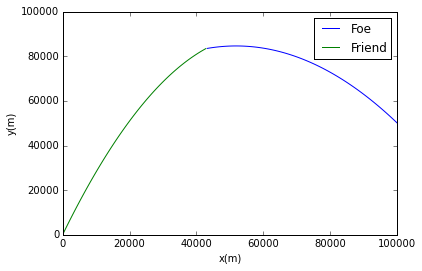

In [11]:
tFinal = 100
xFinal, yFinal = projectile(125, 1000, 1, tFinal, "foe", y0 = 50000, x0 = 100000)
vx, vy = velocity_components(tFinal, xFinal, yFinal)
print("vx =", vx, "vy = ", vy)
v0,theta = firing_parameters(vx, vy)
print("v0 = ", v0, "theta = ", theta)
projectile(theta, v0, 1, tFinal, "friend", y0 = 0, x0 = 0)

## Results and Analysis
The image above shows the trajectories of two projectiles.  One which is a friendly projectile (Green), and the other which is an enemy projectile (Blue).  The enemy projectile is first detected 100 kilometers away at a height of 50 kilometers. Its trajectory is calculated, and a friendly projectile is fired to intercept the enemy projectile 100 seconds after being detected.  The based on the enemy projectiles trajectory, in 100 seconds it will be e approximately 40 kilometers away from our launch point at a height of about 80 kilometers.  Using this information, we calculate that our intercepting missile needs to be fired with an initial velocity of 1392.0328 meters per second at an angle of 71.9135 degrees from the horizontal.

Final x position =  14537.110983693688 Final y position =  63888.59459905998
vx = 96.91407322462459 vy =  1159.9918193146586
v0 =  1164.0332291072793 theta =  85.22418914500193
Final x position =  14440.196910469078 Final y position =  64673.72107788455


(14440.196910469078, 64673.72107788455)

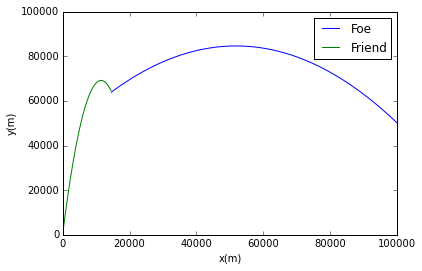

In [12]:
tFinal = 150
xFinal, yFinal = projectile(125, 1000, 1, tFinal, "foe", y0 = 50000, x0 = 100000)
vx, vy = velocity_components(tFinal, xFinal, yFinal)
print("vx =", vx, "vy = ", vy)
v0,theta = firing_parameters(vx, vy)
print("v0 = ", v0, "theta = ", theta)
projectile(theta, v0, 1, tFinal, "friend", y0 = 0, x0 = 0)

In this scenario, the enemy projectile has the same trajectory, but out missile intercepts it after 150 seconds of beind detected instead of 100 seconds.  Out friendly projectile intercepts the enemy projectile about 17 kilometers away from the launch point at a height of approximately 60 kilometers.  If it takes an extra 50 seconds to intercept the enemy projectile, than it is able to get about 23 kilometers closer to the point from which our friendly projectile is fired.

In [ ]:
http://pages.cs.wisc.edu/~sifakis/courses/cs412-s13/lecture_notes/CS412_5_Feb_2013.pdf